## Cloud Computing for Distributed Big Data Applications Option : Centralized Machine Learning

#### The goal of this lab is to get you familiar with the basics of machine learning.

#### You will be asked to train an ML model for a relatively simple dataset 'MNIST' using the torch package

In [2]:
## import the package

import torch

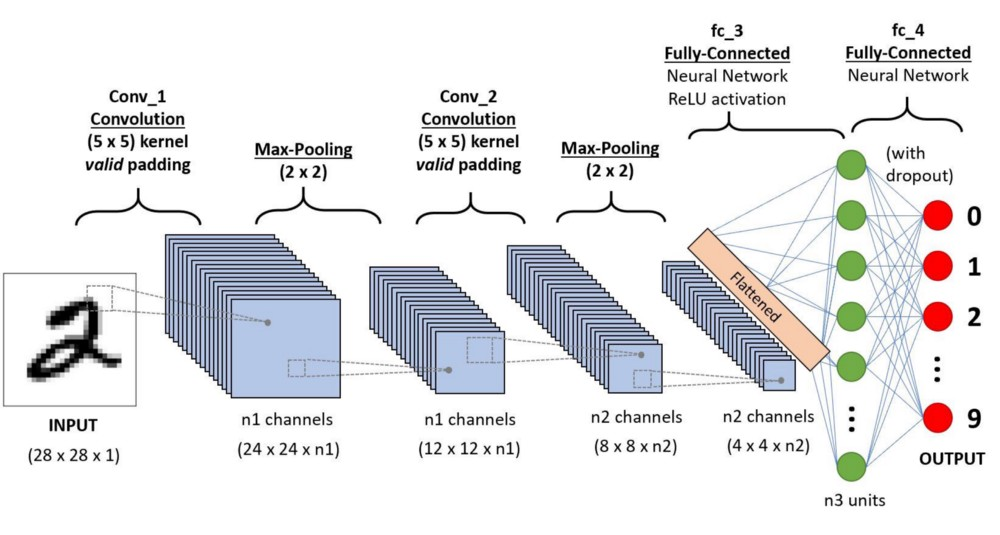

In [ ]:
from IPython import display
from base64 import b64decode
display.Image(b64decode(base64_data))

See the documentation
https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html 

#### Below is a potentially good model architecture to start with. 
![](model_architecture.jpeg)


In [3]:
## create the model 

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self,):
        super(Net, self).__init__()
        ## define the model layer according to the architecture
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 4 * 4, 32)
        self.fc2 = nn.Linear(32, 10)
    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = self.pool(self.conv2(x))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

See Documentation https://pytorch.org/vision/stable/datasets.html

##### The MNIST dataset is  a database of handwritten digits. it has a training set of 60,000 examples, and a test set of 10,000 examples.  The digits have been size-normalized and centered in a fixed-size image.

##### In the next two cells, you are asked to first : load both the training and test set of MNIST while appllying  the appropriate transformations & second : take a closer look at the dataset by checking the images' shape, the label & displaying some images ( Matplolib library is an option for that)

In [4]:
## Prepare Dataset
from torchvision import datasets, transforms

transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST(root='data',train = True, transform = transform, download = True)
test_dataset = datasets.MNIST(root='data',train= False, transform = transform)

def get_dataset():  
    """ Returns train and test datasets for MNIST
        Data is normalized using (0.1307,), (0.3081,)
    """
    
    return train_dataset, test_dataset
  
len(train_dataset)

60000

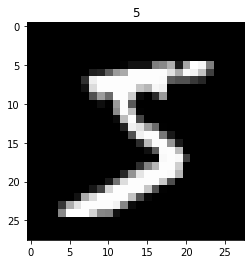

In [ ]:
## Display Images 
import matplotlib.pyplot as plt
plt.imshow(train_dataset.data[0], cmap='gray')
plt.title('%i' % train_dataset.targets[0])
plt.show()

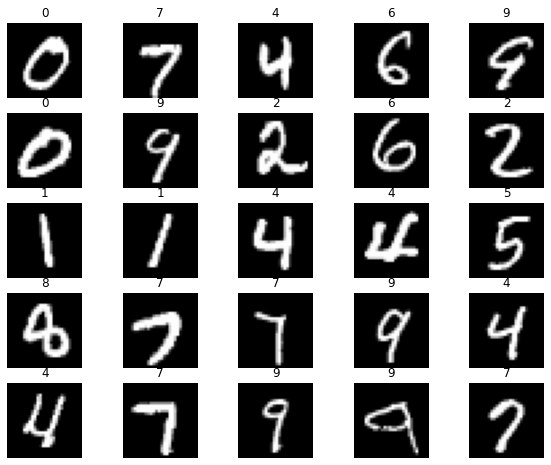

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

##### Here you have to implement the train function of your model. 

##### A test function is provided for the evaluation of the model.


In [5]:
def train(epoch, net, optimizer, criterion, trainloader):
    net.train()
    for batch_idx, (images, labels) in enumerate(trainloader):
        ## Initialize the model
        ##  classify the images using the model
        ## compute the loss between the real labels and predicted labels
        ## backpropagate the loss
        ## update the optimizer
        net.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        ## display the loss & epoch, every 10 batchs for instance.
        #print("Loss:"+ str(loss.item()) + ", Epoch:" + str(epoch) + ", Batch number "+ str(batch_idx))
def test(model, criterion, testloader):
    model.eval()
    loss, total, correct = 0.0, 0.0, 0.0

    for batch_idx, (images, labels) in enumerate(testloader):
        #images, labels = images.to(device), labels.to(device)

        # Inference
        outputs = model(images)
        batch_loss = criterion(outputs, labels)
        loss += batch_loss.item()

        # Prediction
        _, pred_labels = torch.max(outputs, 1)
        pred_labels = pred_labels.view(-1)
        correct += torch.sum(torch.eq(pred_labels, labels)).item()
        total += len(labels)

    accuracy = correct / total
    return accuracy*100, loss

See Documentation : https://pytorch.org/docs/stable/generated/torch.optim.SGD.html and https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

In [ ]:
from time import time
from torch.utils.data import DataLoader
import torch.optim as optim

def main():
    
    ## You can play with these parameters & observe how they effect the training process.
    learning_rate = 0.001
    batch_size = 256 # Very important
    epochs = 5 # Not very important after 5
    
    
    ## instantiate your model
    net = Net()
    ## create two dataloaders (train & test) to load data into batches

    trainloader = DataLoader(train_dataset, batch_size, shuffle = True)

    testloader = DataLoader(test_dataset, batch_size, shuffle = True)  
    ## instantiate an optimizer for you model, as well as a criterion/loss function - SGD
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(net.parameters())
    
    # Evaluating the model before any training steps is a good practice
    accuracy, loss = test(net, criterion, testloader)
    print('Before training :',f'Accuracy: {accuracy}', f'Loss: {loss}' )
    
    time0 = time() 
    for epoch in range(epochs):
        train(epoch, net, optimizer, criterion, trainloader)
        accuracy, loss = test(net, criterion, testloader)
        print(f'Epoch :{epoch}',f'Accuracy: {accuracy}', f'Loss: {loss}' )
    print(f'Training Time (minutes) :{(time()-time0) / 60}')

In [ ]:
main()

KeyboardInterrupt: ignored

[[0.20154064 0.24104954 0.25223482 0.21065324 0.10145892 0.13214506
  0.20595472 0.17567809 0.21721735 0.1889838 ]
 [0.20311782 0.19651374 0.11552686 0.14184234 0.23506449 0.22922416
  0.21900811 0.35169563 0.35472788 0.25931176]
 [0.32511385 0.07257696 0.41142416 0.22573542 0.19326568 0.2823183
  0.34880455 0.19178374 0.15847647 0.29024708]
 [0.140865   0.26941571 0.12825262 0.16381072 0.14911792 0.1705774
  0.08542232 0.15273242 0.16832991 0.12579044]
 [0.12936269 0.22044405 0.09256153 0.25795828 0.321093   0.18573509
  0.14081031 0.12811013 0.10124839 0.13566692]]


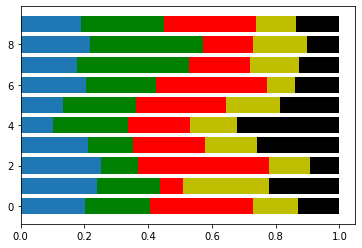

In [24]:
import numpy
import matplotlib.pyplot as plt

alpha = 5
nusers = 5
ndata = 10

diri = numpy.random.dirichlet([alpha]*nusers , ndata).transpose()

plt.barh(range(10), diri[0])
plt.barh(range(10), diri[1], left=diri[0], color='g')
plt.barh(range(10), diri[2], left=diri[0]+diri[1], color='r')
plt.barh(range(10), diri[3], left=diri[0]+diri[1]+diri[2], color='y')
plt.barh(range(10), diri[4], left=diri[0]+diri[1]+diri[2]+diri[3], color='black')

print(diri)

In [ ]:
print(diri[0,0]+diri[1,0]+diri[2,0]+diri[3,0]+diri[4,0])

1.0


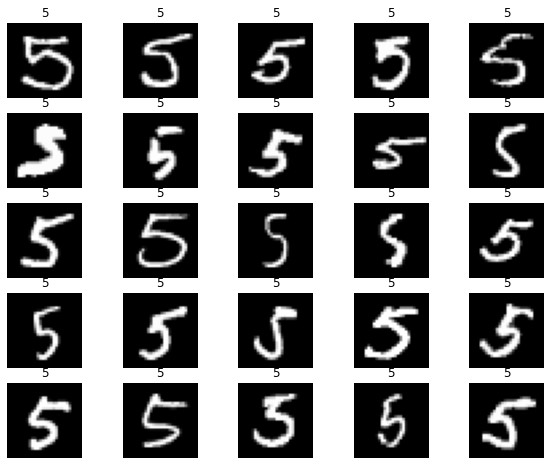

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Subset

trainDict = {}
subsetDict = {}
labels = train_dataset.targets
numbersRg = list(range(0,9))
for i in numbersRg:
  trainDict['train{0}'.format(i)] = []

for j in numbersRg:
  for i in range(len(labels)):
    tensor = "tensor(" + str(j) + ")"
    if str(labels[i]) == tensor:
      trainDict['train{0}'.format(j)].append(i)

for i in numbersRg:
   subsetDict['subset{0}'.format(i)] = Subset(train_dataset, trainDict['train{0}'.format(i)])

figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(subsetDict['subset5']), size=(1,)).item()
    img, label = subsetDict['subset5'][sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

[0, 1, 2, 3, 4]
range(0, 1193)
range(1194, 2396)
range(2397, 4321)
range(4322, 5155)
range(5156, 5921)
range(0, 1625)
range(1626, 2949)
range(2950, 3438)
range(3439, 5254)
range(5255, 6740)
range(0, 1502)
range(1503, 2190)
range(2191, 4641)
range(4642, 5405)
range(5406, 5956)
range(0, 1291)
range(1292, 2160)
range(2161, 3543)
range(3544, 4547)
range(4548, 6128)
range(0, 592)
range(593, 1965)
range(1966, 3094)
range(3095, 3965)
range(3966, 5840)
range(0, 716)
range(717, 1958)
range(1959, 3488)
range(3489, 4412)
range(4413, 5418)
range(0, 1218)
range(1219, 2514)
range(2515, 4578)
range(4579, 5083)
range(5084, 5916)
range(0, 1100)
range(1101, 3303)
range(3304, 4504)
range(4505, 5460)
range(5461, 6262)
range(0, 1270)
range(1271, 3345)
range(3346, 4272)
range(4273, 5256)
range(5257, 5848)


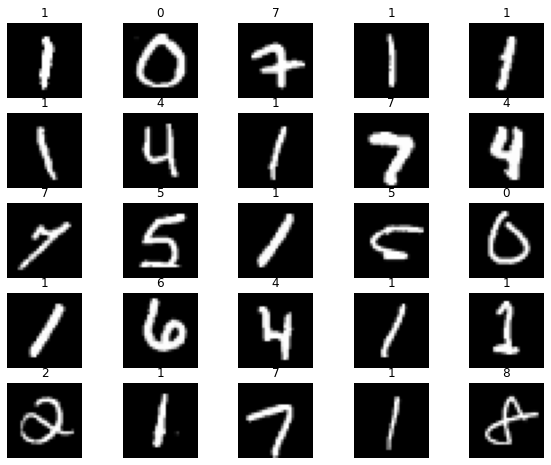

In [37]:
from torch.utils.data import ConcatDataset

clientDict = {}
clientSetDict = {}
sizeDatasets = {}
sizeDatasetsClients = {}
subsetsNestDict = {}
labels = train_dataset.targets
numberClients = list(range(nusers))
print(numberClients)
for j in numberClients:
  clientDict['client{0}set'.format(j+1)] = []

for i in numbersRg:
  sizeDatasets['n{0}'.format(i)] = len(subsetDict['subset{0}'.format(i)])
  for j in numberClients:
    if j == 0:
      newRg = 0
      lastRg = 0
    sizeDatasetsClients['n' + str(i) + '_client' + str(j)] = int(diri[j,i] * sizeDatasets['n{0}'.format(i)])
    newRg += sizeDatasetsClients['n' + str(i) + '_client' + str(j)]
    diricSize = range(lastRg, newRg)
    print(diricSize)
    lastRg = newRg + 1
    subsetsNestDict['client' + str(j) + '_set' + str(i)] = Subset(subsetDict['subset{0}'.format(i)], diricSize)
    clientDict['client{0}set'.format(j+1)].extend(subsetsNestDict['client' + str(j) + '_set' + str(i)])


figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(clientDict['client4set']), size=(1,)).item()
    img, label = clientDict['client4set'][sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [31]:
from time import time
from torch.utils.data import DataLoader
import torch.optim as optim

#Make a global model
netGlobal = Net()


def mainFL():
    
    ## You can play with these parameters & observe how they effect the training process.
    learning_rate = 0.01
    batch_size = 64 # It has to be lower due to a lower number of data
    epochs = 5 # Not very important after 5 in centralised, important for FL

    
    ## instantiate your nets a datasets
    net1 = Net()
    net2 = Net()
    net3 = Net()
    net4 = Net()
    net5 = Net()
    netGlobal = Net()
    netList = [net1, net2, net3, net4, net5]
    datasetList = [clientDict['client1set'], clientDict['client2set'], clientDict['client3set'], clientDict['client4set'], clientDict['client5set']]
    tupleData = list(zip(netList,datasetList))
    clients = [0,1,2,3,4]
     
    time0 = time()
    for epoch in range(epochs):
      net_dict = {}
      criterion = nn.CrossEntropyLoss()
      for index,(i,j) in enumerate(tupleData):          
          ## create dataloaders for each user (train & test) to load data into batches
          trainloader = DataLoader(j, batch_size, shuffle = True)
          testloader = DataLoader(test_dataset, batch_size, shuffle = True)  
          ## instantiate an optimizer for you model, as well as a criterion/loss function - SGD         
          optimizer = optim.Adam(i.parameters(), lr= learning_rate)
    
          # Evaluating the model before any training steps is a good practice
          accuracy, loss = test(i, criterion, testloader)
          print('Before training :',f'Accuracy: {accuracy}', f'Loss: {loss}',f'Client {index+1}' )
           
          train(epoch, i, optimizer, criterion, trainloader)
          accuracy, loss = test(i, criterion, testloader)
          net_dict[index] = i
          print('After training :',f'Accuracy: {accuracy}', f'Loss: {loss}',f'Client {index+1}' )
  
      netGlobal = aggregrate_models(net_dict, netGlobal, clients)
      for model, _ in tupleData:
        model.load_state_dict(netGlobal.state_dict())
      accuracy, loss = test(netGlobal, criterion, testloader)
      print(f'Epoch: {epoch+1}',f'Accuracy: {accuracy}', f'Loss: {loss}')
    print('Training Time (minutes):' + str((time()-time0) / 60))

    accuracy, loss = test(netGlobal, criterion, testloader)
    print(f'Accuracy: {accuracy}', f'Loss: {loss}', f'Learning Rate {learning_rate}')
    

In [16]:
def aggregrate_models(net_dict, netGlobal, clients): 
    update_state = {}
    first = True
    for k in clients:
        for key in net_dict[k].state_dict().keys():
            if first:
                update_state[key] = net_dict[k].state_dict()[key]
            else:
                update_state[key] += net_dict[k].state_dict()[key]
        first = False
    for key in update_state:
        update_state[key] = update_state[key] / len(clients)

    netGlobal.load_state_dict(update_state)
    return netGlobal

In [32]:
mainFL()

Before training : Accuracy: 8.84 Loss: 363.4348919391632 Client 1
After training : Accuracy: 86.04 Loss: 279.9841806292534 Client 1
Before training : Accuracy: 11.26 Loss: 363.29501080513 Client 2
After training : Accuracy: 86.69 Loss: 367.8806431889534 Client 2
Before training : Accuracy: 8.7 Loss: 364.59908723831177 Client 3
After training : Accuracy: 86.38 Loss: 309.89152762293816 Client 3
Before training : Accuracy: 18.65 Loss: 359.64574003219604 Client 4
After training : Accuracy: 86.64 Loss: 281.4072878956795 Client 4
Before training : Accuracy: 9.87 Loss: 364.2033591270447 Client 5
After training : Accuracy: 84.88 Loss: 340.8801203966141 Client 5
Epoch: 1 Accuracy: 13.4 Loss: 358.93449354171753
Before training : Accuracy: 13.4 Loss: 358.93666672706604 Client 1
After training : Accuracy: 85.97 Loss: 336.6623545885086 Client 1
Before training : Accuracy: 13.4 Loss: 358.9453778266907 Client 2
After training : Accuracy: 85.71 Loss: 356.7136523425579 Client 2
Before training : Accura

In [ ]:
mainFL()

Before training : Accuracy: 11.24 Loss: 360.690372467041 Client 1
Epoch: 0 Accuracy: 82.13000000000001 Loss: 304.992103099823 Client 1
Epoch: 1 Accuracy: 84.61999999999999 Loss: 288.37187081575394 Client 1
Epoch: 2 Accuracy: 86.26 Loss: 270.81847101449966 Client 1
Epoch: 3 Accuracy: 86.67 Loss: 269.927990347147 Client 1
Epoch: 4 Accuracy: 87.16000000000001 Loss: 271.3692548274994 Client 1
Training Time Client 1(minutes):0.45500451723734536
Before training : Accuracy: 8.92 Loss: 362.83163142204285 Client 2
Epoch: 0 Accuracy: 82.67 Loss: 168.7133373916149 Client 2
Epoch: 1 Accuracy: 85.39999999999999 Loss: 178.9130053371191 Client 2
Epoch: 2 Accuracy: 86.99 Loss: 169.8560634702444 Client 2
Epoch: 3 Accuracy: 87.16000000000001 Loss: 162.81113712489605 Client 2
Epoch: 4 Accuracy: 87.3 Loss: 169.29479610919952 Client 2
Training Time Client 2(minutes):0.46853724320729573
Before training : Accuracy: 7.59 Loss: 363.7604441642761 Client 3
Epoch: 0 Accuracy: 73.11999999999999 Loss: 748.672041416